# Pymaceuticals Inc.
---

### Analysis

- Mice with the drugs "Ceftamin" and "Infubinol" are left with much larger tumors on average than mice with the drugs "Ramicane" and "Capomulin", as we can see from our box plot. Hence, it appears those 2 drugs are more effective than the rest. From the pie plot, we can see that we have almost the same number of male mice as female mice, although the male value is slightly more. From the bar chart, the drugs "Capomulin" and "Ramicane" are much more observed than all other drugs as they have quite a few more timepoints than any other drug regimen used, telling us that the two drugs have the most reliable samples since they have larger sample sizes than all other drug treatments. 
- From all this, we begin to get a bit more specific in the line and scatter plot sections. We choose to closely observe "Capomulin" since it has shown to be more effective, and has a larger sample than other drugs--thereby being more reliable. So, the scatter plot shows for our specific mouse that originally the treatment increases the tumor's size, but over time it begins to decrease more and more as the treatment really starts to kick in. Then, our scatter plot shows that the weight of each mouse is greater when it has a larger tumor. Again, this makes a ton of sense since the tumor is a part of them, so as a tumor increases in size, that will only increase a mouses weight. Finally, we have our correlation coefficient and regression line. Since our pearson's r is very close to +1, we can say that the two variables have a very strong correlation (mouse weight and tumor volume).
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_DF = pd.merge(study_results, mouse_metadata, how="left")
# Display the data table for preview
merged_DF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(merged_DF["Mouse ID"].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duples_mice = merged_DF[merged_DF[["Mouse ID", "Timepoint"]].duplicated() == True]
duples_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duples_ID = merged_DF.loc[merged_DF["Mouse ID"] == 'g989']
duples_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_droppings = merged_DF[merged_DF["Mouse ID"] != 'g989']
mouse_droppings.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_droppings["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
new_mean = mouse_droppings.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
new_median = mouse_droppings.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
new_var = mouse_droppings.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
new_std = mouse_droppings.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
new_sem = mouse_droppings.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sumStats = pd.DataFrame({"Mean Tumor Volume": new_mean,
                        "Median Tumor Volume": new_median,
                        "Tumor Volume Variance": new_var,
                        "Tumor Volume Std. Dev.": new_std,
                        "Tumor Volume Std. Err.": new_sem})
sumStats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_droppings.groupby("Drug Regimen").aggregate(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

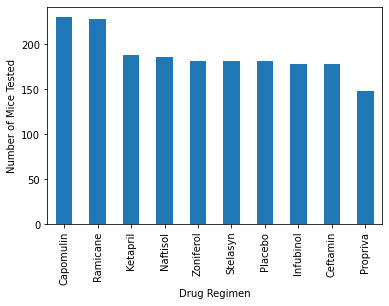

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen
# using Pandas
bar_pand = mouse_droppings["Drug Regimen"].value_counts()
fig1 = bar_pand.plot(kind="bar")
fig1.set_xlabel("Drug Regimen")
fig1.set_ylabel("Number of Mice Tested")
plt.show()

Infubinol and Ceftamin are flipped on my plot in comparison to the example, but they are actually equal in mice count. Hence, my plot used this order by default so it will appear to be different, but all the bar values are still the exact same counts as on the example bar plot 

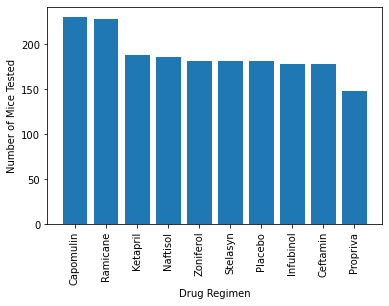

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen
# using pyplot
import numpy as np
xAxis1 = np.arange(len(bar_pand))
bar_py = mouse_droppings["Drug Regimen"].value_counts()
ticks1 = [x for x in xAxis1] # gets all labels on our bar plot
plt.bar(xAxis1, bar_py)
plt.xticks(ticks1, bar_py.index, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

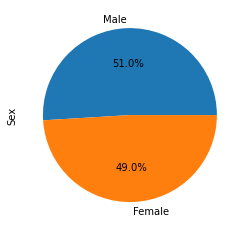

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_pand = mouse_droppings["Sex"].value_counts()
fig2 = pie_pand.plot(kind="pie", autopct="%1.1f%%")

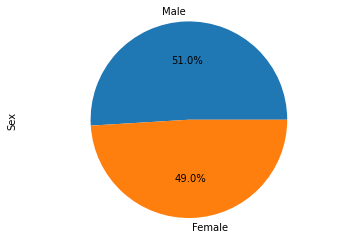

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_py = mouse_droppings["Sex"].value_counts()
vals = pie_py.index
plt.pie(pie_py, labels=vals, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal") # Always use plt.axis("equal") in pie charts in pyplot
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
try_method = mouse_droppings.loc[:,["Mouse ID", "Timepoint"]].groupby(["Mouse ID"])
max_list = try_method.max(["Timepoint"]) # use max to get the greatest timepoints

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_2_DF = pd.merge(max_list, merged_DF, on=["Mouse ID", "Timepoint"])
# very important to use on= attribute, took me awhile to find that out
merge_2_DF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
empty = []

for drug in treatments:
    new_drug = merge_2_DF.loc[merge_2_DF["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    # takes just DF values that have the specific drug
    empty.append(new_drug)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = new_drug.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_outliers = lowerq - (1.5 * iqr)
    upper_outliers = upperq + (1.5 * iqr)
    outliers = []
        
    print(f"{drug}'s IQR = {iqr:.2f}") 
    # shows all of our IQR values for each drug
    print(f"{drug}'s potential lower outliers: Anything below {lower_outliers:.2f}")
    print(f"{drug}'s potential lower outliers: Anything above {upper_outliers:.2f}") 
    # shows what we most likely will consider outliers for each drug
    print("")  

Capomulin's IQR = 7.78
Capomulin's potential lower outliers: Anything below 20.70
Capomulin's potential lower outliers: Anything above 51.83

Ramicane's IQR = 9.10
Ramicane's potential lower outliers: Anything below 17.91
Ramicane's potential lower outliers: Anything above 54.31

Infubinol's IQR = 11.48
Infubinol's potential lower outliers: Anything below 36.83
Infubinol's potential lower outliers: Anything above 82.74

Ceftamin's IQR = 15.58
Ceftamin's potential lower outliers: Anything below 25.36
Ceftamin's potential lower outliers: Anything above 87.67



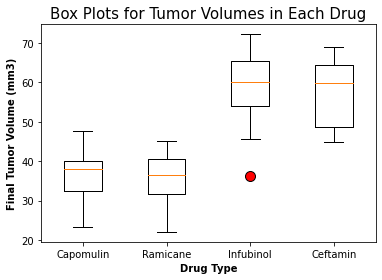

In [104]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, tot_box_plot = plt.subplots()

# used: https://matplotlib.org/3.1.1/gallery/statistics/boxplot.html
# to discover how to make outliers into symbols
flierprops = dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=10)
# we use flierprops to turn our outliers into symbols

tot_box_plot.boxplot(empty, labels=treatments, flierprops=flierprops)
tot_box_plot.set_title("Box Plots for Tumor Volumes in Each Drug", fontsize=15)
tot_box_plot.set_xlabel("Drug Type", fontweight='bold')
tot_box_plot.set_ylabel("Final Tumor Volume (mm3)", fontweight='bold')
plt.show()

## Line and Scatter Plots

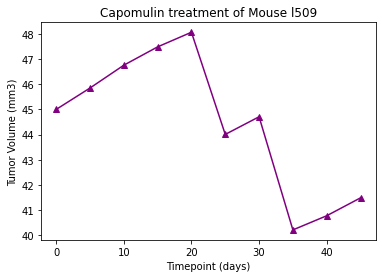

In [81]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = merged_DF.loc[merged_DF["Drug Regimen"]=="Capomulin"]

# we'll choose the mouse in the example frame - ID 'l509'
ID = 'l509'
capomulin_subset = capomulin_data.loc[capomulin_data["Mouse ID"]==ID]

xData1 = capomulin_subset["Timepoint"]
yData1 = capomulin_subset["Tumor Volume (mm3)"]

#capomulin_data
plt.plot(xData1, yData1, color='purple', marker ='^')
# changed the marker just for fun
plt.title(f"Capomulin treatment of Mouse {ID}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

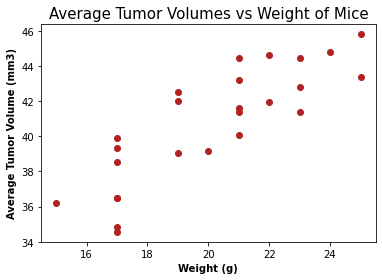

In [100]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_DF = capomulin_data.groupby("Mouse ID").mean()

xData2 = scatter_DF["Weight (g)"]
yData2 = scatter_DF["Tumor Volume (mm3)"]

plt.scatter(xData2, yData2, color='firebrick')
# thanks TAs for the python color list
plt.xlabel("Weight (g)", fontweight='bold')
plt.ylabel("Average Tumor Volume (mm3)", fontweight='bold')
plt.title("Average Tumor Volumes vs Weight of Mice", fontsize=15)
plt.show()

## Correlation and Regression

In [92]:
from scipy.stats import linregress
# need to import linregress to run regression analysis functions

The correlation between between mouse weight and the average tumor volume is: 0.84


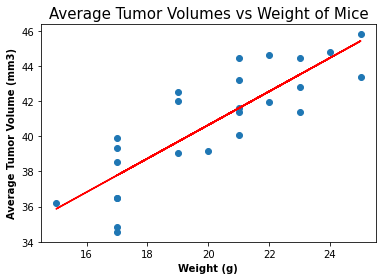

In [96]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(xData2, yData2)
print(f"The correlation between between mouse weight and the average tumor volume is: {correlation[0]:.2f}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(xData2, yData2)
# gets all our intercept values
intercept_line = slope*xData2 + intercept
# y = mx + b
plt.scatter(xData2, yData2)
plt.plot(xData2, intercept_line, color='red')
plt.xlabel("Weight (g)", fontweight='bold')
plt.ylabel("Average Tumor Volume (mm3)", fontweight='bold')
plt.title("Average Tumor Volumes vs Weight of Mice", fontsize=15)
plt.show()
